<h1>AID101_FDS_Term project</h1>
<p><strong>Ajnur Bogucanin | IUS | 2024</strong></p>
<p>Term project/presentation is one of the grading activities defined in the syllabus 
for the Course AID101 – FUNDAMENTALS OF DATA SCIENCE in which each student 
will have to work on a practical case study with a focus on using databases from 
the real-life. </p>

<h2>Dataset information</h2>
<p><strong>German Car Insights by YAMIN HOSSAIN</strong> on Kaggle. Reason why I chose this dataset is detailed data, but still plenty room for cleaning and showing off skills needed for the task. Dataset is .csv fromat and can be found <a href="https://www.kaggle.com/datasets/yaminh/german-car-insights/data">here</a>.</p>
<p>Content of the dataset are listing information for cars in Germany. It is consisted of 15 columns and 100,000 rows untouched.</p>

<h2>Dependencies</h2>

In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<h2>Important variables</h2>

In [2]:
#List of columns we do not need from the Dataset
invalids = ['Unnamed: 0' , 'color' , 'registration_date' , 'offer_description' , 'fuel_consumption_g_km']

In [3]:
#Invalids dates data
invalids_date = [
       'Petrol','Diesel', '04/2017', 'Automatic', '113.000 km', '05/2017',
       'Hybrid', '3700', 'Electric', '01/2019', '06/2021', '8.000 km', 'Manual',
       '02/2020', '04/2006', 'LPG', '07/2021', '32.250 km', '03/2023','12/2003'
]

<h2>Data Integration</h2>

In [4]:
df = pd.read_csv('gcar_data.csv')

<h2>Data Cleaning</h2>

In [5]:
df.isnull().any().any()

True

In [6]:
df.nunique()

Unnamed: 0                  100000
brand                           29
model                          590
color                           14
registration_date              369
year                            49
price_in_euro                11652
power_kw                       490
power_ps                       480
transmission_type                4
fuel_type                       54
fuel_consumption_l_100km       404
fuel_consumption_g_km          937
mileage_in_km                34479
offer_description            79777
dtype: int64

In [7]:
#Check columns
df.columns

Index(['Unnamed: 0', 'brand', 'model', 'color', 'registration_date', 'year',
       'price_in_euro', 'power_kw', 'power_ps', 'transmission_type',
       'fuel_type', 'fuel_consumption_l_100km', 'fuel_consumption_g_km',
       'mileage_in_km', 'offer_description'],
      dtype='object')

In [8]:
#Remove unwanted columns
df = df.drop(columns=invalids)

In [9]:
df.columns

Index(['brand', 'model', 'year', 'price_in_euro', 'power_kw', 'power_ps',
       'transmission_type', 'fuel_type', 'fuel_consumption_l_100km',
       'mileage_in_km'],
      dtype='object')

In [10]:
df.dtypes

brand                        object
model                        object
year                         object
price_in_euro                object
power_kw                     object
power_ps                     object
transmission_type            object
fuel_type                    object
fuel_consumption_l_100km     object
mileage_in_km               float64
dtype: object

In [11]:
#Checking for values in col year
df['year'].unique()

array(['2023', '2018', '2021', '2009', '2019', '2012', '2022', '2016',
       '2005', '1999', '2015', '2004', '2020', '2011', '2017', '2010',
       '2013', '2014', '2007', '2003', '2008', '2001', '1998', '2002',
       '2000', '2006', '1995', '1997', '1996', 'Manual', 'Petrol',
       'Diesel', '04/2017', 'Automatic', '113.000 km', '05/2017',
       'Hybrid', '3700', 'Electric', '01/2019', '06/2021', '8.000 km',
       '02/2020', '04/2006', 'LPG', '07/2021', '32.250 km', '03/2023',
       '12/2003'], dtype=object)

In [12]:
#Removing invalid data from year column
for invalid in invalids_date:
    df = df[df['year'] != invalid]

In [13]:
df['year'].unique()

array(['2023', '2018', '2021', '2009', '2019', '2012', '2022', '2016',
       '2005', '1999', '2015', '2004', '2020', '2011', '2017', '2010',
       '2013', '2014', '2007', '2003', '2008', '2001', '1998', '2002',
       '2000', '2006', '1995', '1997', '1996'], dtype=object)

In [14]:
#Preparing fuel consumption column for numerical data type 
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].str.replace(' l/100 km','')
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].str.replace(',','.')

In [15]:
df['fuel_consumption_l_100km'].unique()

array(['5.4', '4.6', nan, '7.5', '5.9', '6.7', '8.9', '5.6', '5', '7.4',
       '8.2', '9.4', '3.8', '5.3', '6.9', '7.2', '8.4', '4.7', '6.1',
       '6.3', '4.9', '4.8', '4.5', '6.2', '6.6', '9.3', '4.1', '8.3',
       '4.4', '9.9', '4.3', '6.4', '7.6', '7.9', '5.8', '2', '12.3',
       '5.5', '5.2', '6', '6.8', '5.1', '7.8', '0 kWh/100 km', '3.9',
       '12.1', '17.9', '12.7', '10.2', '1.8', '3.5', '8.1', '11.7', '11',
       '16.9', '7.7', '6.5', '5.7', '7.1', '7', '4', '1.4', '4.2', '8.7',
       '9.5', '10.1', '7.3', '8', '12', '9.6', '8.5', '- (l/100 km)',
       '15.8', '12.8', '9', '8.8', '9.7', '14.7', '62 km (Ort)', '1.3',
       '10.7', '17.2', '14.6', '11.5', '9.8', '13.6', '10.5', '13.8',
       '11.1', '10.3', '1.9', '1.1', '14.3', '13.4', '3.6', '19', '12.5',
       '12.2', '21.3', '14.1', '2.1', '10.4', '1.7', '13.3', '14.4',
       '3.2', '14', '2.3', '1.2', '10', '11.8', '2.2', '12.6', '1.6',
       '1.5', '11.2', '17.1', '8.6', '11.9', '11.4', '15.3', '9.2',
       

In [16]:
df['fuel_type'].unique()

array(['Hybrid', 'Petrol', 'Electric', 'Diesel', 'LPG', 'Diesel Hybrid',
       'Other', 'CNG', 'Unknown', 'Hydrogen', 'Ethanol'], dtype=object)

In [17]:
#Filtering only petrol and diesel cars
df = df[df['fuel_type'].isin(['Diesel', 'Petrol'])]

In [18]:
df = df[df['fuel_consumption_l_100km'] != '- (l/100 km)']
df = df[df['fuel_consumption_l_100km'].notna()]

In [19]:
df['fuel_consumption_l_100km'].unique()

array(['4.6', '7.5', '5.9', '6.7', '8.9', '5.4', '5.6', '5', '7.4', '8.2',
       '9.4', '3.8', '5.3', '6.9', '7.2', '8.4', '4.7', '6.1', '6.3',
       '4.9', '4.8', '4.5', '6.2', '6.6', '9.3', '4.1', '8.3', '4.4',
       '9.9', '4.3', '7.6', '7.9', '5.8', '6.4', '12.3', '5.5', '5.2',
       '6', '6.8', '5.1', '7.8', '3.9', '12.1', '17.9', '12.7', '10.2',
       '3.5', '8.1', '11.7', '11', '16.9', '7.7', '6.5', '5.7', '7.1',
       '7', '4', '4.2', '8.7', '9.5', '10.1', '7.3', '8', '12', '9.6',
       '8.5', '15.8', '12.8', '9', '8.8', '9.7', '10.7', '17.2', '14.6',
       '11.5', '9.8', '13.6', '10.5', '13.8', '11.1', '10.3', '14.3',
       '13.4', '3.6', '12.5', '12.2', '21.3', '10.4', '13.3', '14.4',
       '3.2', '14', '10', '11.8', '12.6', '11.2', '17.1', '8.6', '11.9',
       '15.3', '9.2', '17', '18', '19.5', '21.5', '13.7', '14.2', '10.6',
       '11.6', '0', '3.7', '9.1', '11.3', '11.4', '62', '10.9', '10.8',
       '12.4', '13', '14.5', '13.1', '13.9', '3.4', '15.1', '14.8',


In [20]:
#Data type conversion
df = df.astype({
    'year' : int,
    'price_in_euro' : float,
    'power_kw' : float,
    'power_ps' : float,
    'fuel_consumption_l_100km' : float
})

In [21]:
df.shape

(83675, 10)

In [22]:
df = df.dropna()

In [23]:
df.shape

(83627, 10)

In [24]:
df = df.sort_values(by='year' , ascending=True)

<h2>Visuals</h2>

In [25]:
average_price_by_brand = df.groupby('brand')['price_in_euro'].mean()

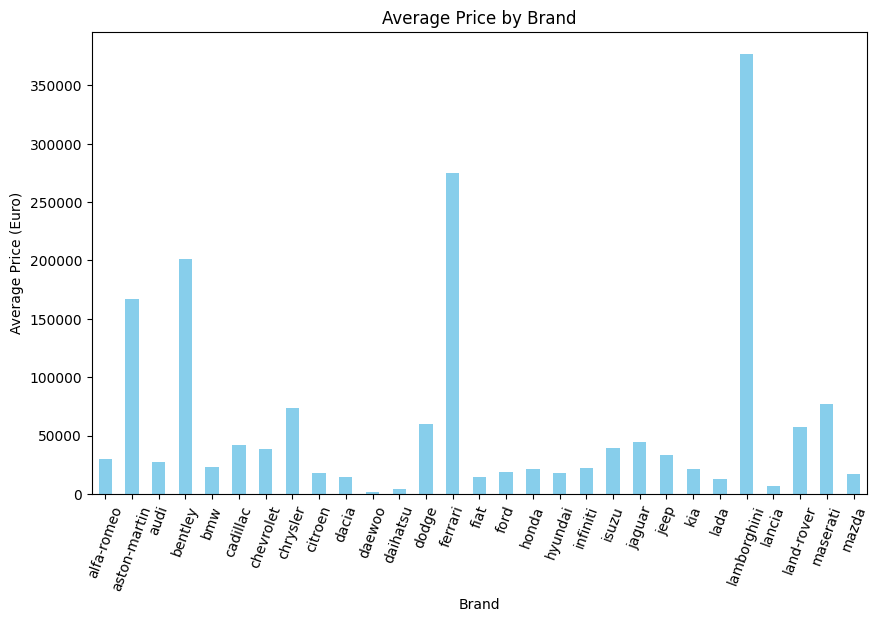

In [26]:
plt.figure(figsize=(10, 6))
average_price_by_brand.plot(kind='bar' , color='skyblue')
plt.title('Average Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price (Euro)')
plt.xticks(rotation=70)
plt.show()

In [27]:
avg_fuel_consumption = df.groupby('fuel_type')['fuel_consumption_l_100km'].mean()

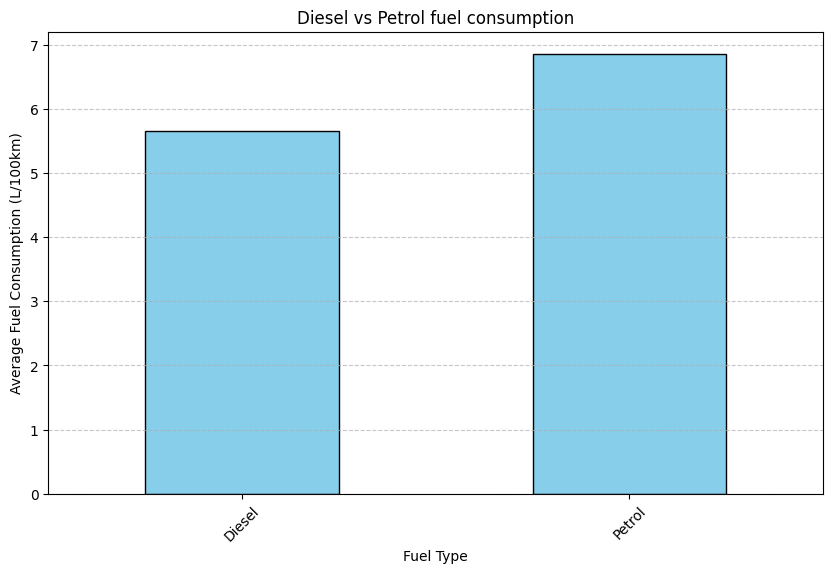

In [28]:
plt.figure(figsize=(10, 6))
avg_fuel_consumption.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Diesel vs Petrol fuel consumption')
plt.xlabel('Fuel Type')
plt.ylabel('Average Fuel Consumption (L/100km)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [29]:
avg_kw_by_fuel = df.groupby('fuel_type')['power_kw'].mean()

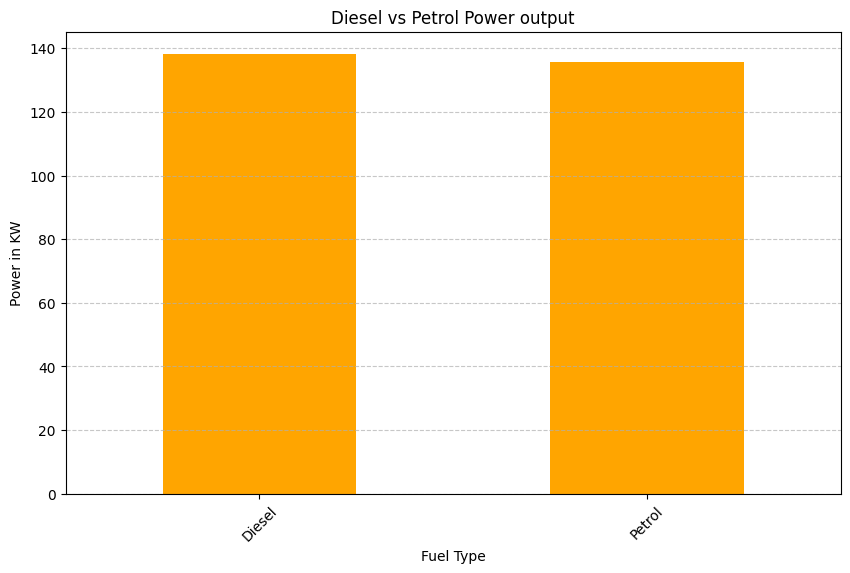

In [30]:
plt.figure(figsize=(10, 6))
avg_kw_by_fuel.plot(kind='bar', color='orange')
plt.title('Diesel vs Petrol Power output')
plt.xlabel('Fuel Type')
plt.ylabel('Power in KW')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h2>Stats</h2>

In [31]:
df.describe()

,year,price_in_euro,power_kw,power_ps,fuel_consumption_l_100km,mileage_in_km
count,83627.000000,8.362700e+04,83627.000000,83627.000000,83627.000000,8.362700e+04
mean,2015.989668,2.718229e+04,136.763653,186.028400,6.360671,9.206260e+04
std,5.174287,4.369807e+04,78.407861,106.584845,2.299909,8.002972e+04
min,1995.000000,1.500000e+02,14.000000,19.000000,0.000000,0.000000e+00
25%,2013.000000,1.199000e+04,88.000000,120.000000,5.100000,3.290000e+04
50%,2017.000000,1.922000e+04,110.000000,150.000000,5.900000,7.604700e+04
75%,2019.000000,2.998000e+04,150.000000,204.000000,7.000000,1.360000e+05
max,2023.000000,5.890500e+06,735.000000,999.000000,141.000000,3.800000e+06


<h2>Linear Regression</h2> <br> <p>Trying to predict a car price based on mileage on a car.</p>

In [32]:
df = df[df['price_in_euro'] > 1]

In [33]:
#Checking unique values of years to see if df is sorted
df.year.unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022, 2023])

<p><strong>Model</strong></p>

In [34]:
X = df[['mileage_in_km']]

In [35]:
y = df['price_in_euro'] 

In [36]:
model = LinearRegression()

In [37]:
model.fit(X, y)

LinearRegression()

In [38]:
model.coef_[0].round(3)

-0.146

In [39]:
model.intercept_.round(3)

40632.87

<p><strong>Prediction</strong></p>

In [40]:
predicted_price = model.predict([[225000]])

C:\Users\ajnur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [41]:
predicted_price[0]

7759.803184645862

<p><strong>Comparsion to our data</strong></p>

In [42]:
sample = df[df['mileage_in_km'] <= 250000]

In [43]:
sample = sample[sample['mileage_in_km'] >= 200000]

In [44]:
sample.price_in_euro.median()

7999.0

In [45]:
predicted_price[0]

7759.803184645862

In [46]:
sample.price_in_euro.median() - predicted_price[0]

239.19681535413838

<p><strong>Conclusion</strong></p>
<p><strong>Slope : -0.146</strong> | This shows us that model predicted that the price goes down for ~-0.14 EUR for every kilometer. We generally believe that car should be better the less it is used, which reflects on the price.</p>
<p><strong>Intercept : 40632.87</strong> | This values shows us if car had 0 mileage what the price should it be. I sadly did not have enough time to prove this one with data, but form a personal observations it is a pretty accurate prediction.</p>

<p><strong>Personal test</strong> | I have used range of mileage that is close to the one which we predicted and when I took the median from that df, we have proven that we got a pretty close prediction. (239.19 EUR difference)</p>

<h2>Export</h2>

In [47]:
#Converting Notebook to .py for word file

In [48]:
!jupyter nbconvert --to python Ajnur_Bogucanin.ipynb 

[NbConvertApp] Converting notebook Ajnur_Bogucanin.ipynb to python
[NbConvertApp] Writing 6036 bytes to Ajnur_Bogucanin.py
